In [ ]:
#import necessary libraries
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from shutil import copyfile
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

print(f"Keras version: {keras.__version__}")
print(f"Using backend: {keras.backend.backend()}")

Keras version: 3.12.0
Using backend: tensorflow


In [ ]:
#define classes
CLASS_NAMES = ["benign", "malignant", "normal"]

In [ ]:
#resize sample images
def load_and_preprocess(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = x / 255.0
    x = np.expand_dims(x, axis=0)
    return img, x 

In [ ]:
#functino to predict the class of sample images and display results
def predict():
    #load sample model
    model = keras.models.load_model('model.h5')

    #where the sample data is stores
    demo_root = '../demo_data'

    #iterate through each class folder
    for true_label in CLASS_NAMES:
        class_folder = os.path.join(demo_root, true_label)

        #iterate through each sample image
        for fname in os.listdir(class_folder):
            #get image, process it, and make prediction
            img_path = os.path.join(class_folder, fname)
            img_pil, x = load_and_preprocess(img_path)
            pred = model.predict(x)[0]
            pred_class = CLASS_NAMES[np.argmax(pred)]

            #print results
            print("\n================================")
            #display probabilities for each class
            for c, p in zip(CLASS_NAMES, pred):
                print(f"  {c}: {p:.4f}")

            #display image
            plt.imshow(img_pil)
            #display true and predicted labels
            plt.title(f"True: {true_label} | Predicted: {pred_class}")
            plt.axis("off")
            plt.show()
            print("\n================================")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

  benign: 0.4554
  malignant: 0.1926
  normal: 0.3519


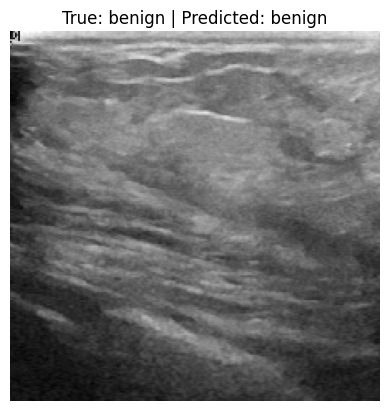


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

  benign: 0.7424
  malignant: 0.1495
  normal: 0.1081


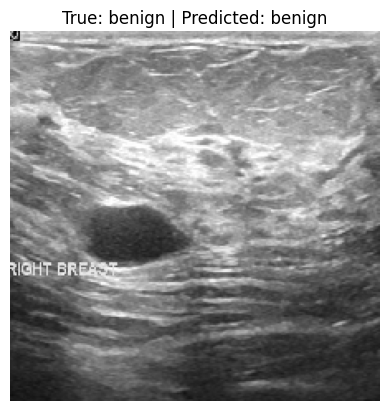


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

  benign: 0.6731
  malignant: 0.3041
  normal: 0.0228


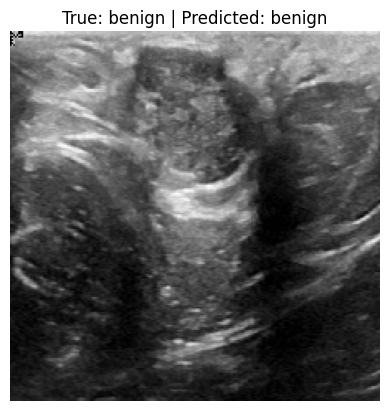


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

  benign: 0.0386
  malignant: 0.9494
  normal: 0.0120


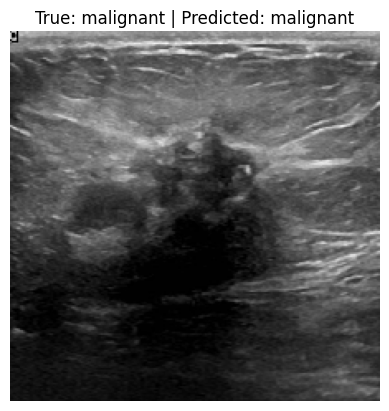


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

  benign: 0.2400
  malignant: 0.4781
  normal: 0.2811


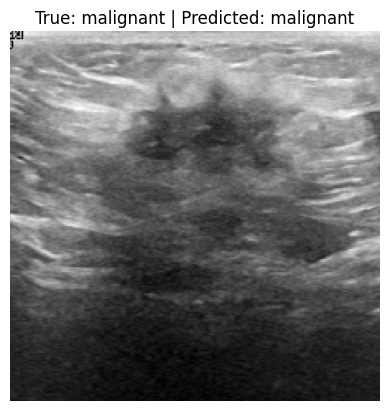


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

  benign: 0.2597
  malignant: 0.6928
  normal: 0.0476


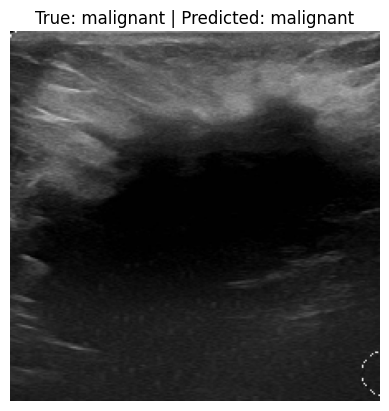


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

  benign: 0.3244
  malignant: 0.1517
  normal: 0.5233


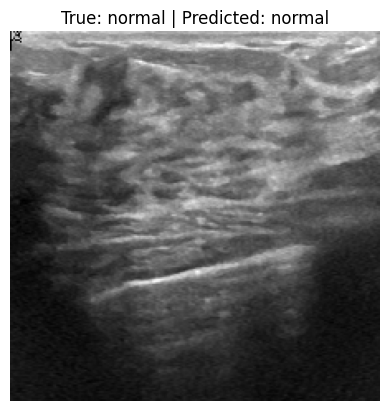


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

  benign: 0.8565
  malignant: 0.1093
  normal: 0.0343


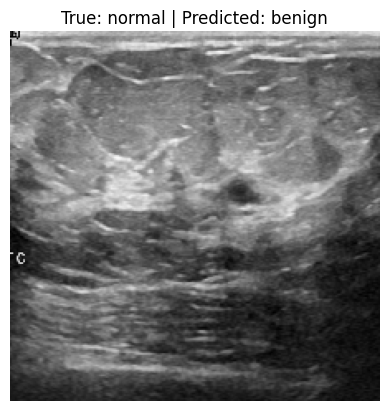


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

  benign: 0.4183
  malignant: 0.0939
  normal: 0.4878


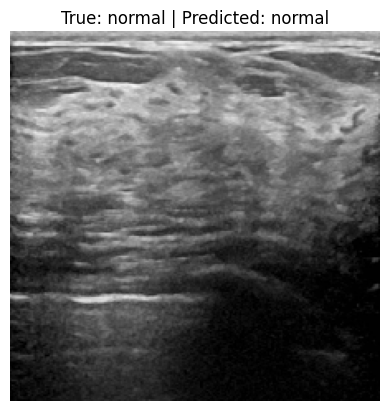

In [10]:
predict()